# Problem Description:

In this notebook, we are applying the concept of Logistic Regression to the Breast Cancer Wisconsin (Diagnostic) dataset using the TensorFlow 2.0. The dataset is available in the UCI repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic.

The same dataset is also available in scikit-learn. Therefore, we make use of the ```sklearn``` module to retrieve the data.

The notebook is organized as follows:

1. Imports
2. Reading the Data
3. Training the Model
4. Making Predictions
5. Saving the Model

### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Reading the Data

In [3]:
# Here we are working with the Breast Cancer dataset, available in the scikit-learn 

data = load_breast_cancer()

In [6]:
# Since the data that is loaded from the sklearn module is a dictionary-like object, we can also access the data using its keys

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
# In order to see the data in a structured format, we need to transform it into a Pandas Dataframe

data_pd = pd.DataFrame(data = data.data, columns = data.feature_names)

In [11]:
# Here, we are using a DataFrame for the purporse of visualizing the data only

data_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Checking the data shape

data.data.shape

(569, 30)

In [8]:
# Checking the target names

data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# Splitting the dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.20, stratify = data.target, random_state = 12345)

In [10]:
# The data shape is going to be passed as a input to the model

N, D = x_train.shape

In [11]:
N, D

(455, 30)

In [12]:
# In order to feed the data to the model, we need to normalize the data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Training the Model

In order to implement a simple Logistic Regression model, we use a single Dense layer, with the Sigmoid activation function at the end. The Sigmoid is represented as follows:

\begin{equation}
    f(x) = \frac{1}{1 + e^{-x}}
\end{equation}

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = D, ),
    tf.keras.layers.Dense(1, activation = "sigmoid") 
])

An alternative way to create TF models: 
```python
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, input_shape = (D, ), activation = "sigmoid"))
```

To compile the model, we optimize the accuracy metric, and also use the Binary Cross Entropy as the loss function, represented as follows:

\begin{equation}
    H_{p}(q) = -\frac{1}{N} \sum_{i=1}^{N} y_{i} \cdot \log(p(y_{i})) + (1 - y_{i}) \cdot \log(1 - p(y_{i}))
\end{equation}

In [14]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [15]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test),
             epochs = 100)

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.4156 - accuracy: 0.8352 - val_loss: 0.4437 - val_accuracy: 0.8246
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8571 - val_loss: 0.4118 - val_accuracy: 0.8333
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.8747 - val_loss: 0.3848 - val_accuracy: 0.8509
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8791 - val_loss: 0.3623 - val_accuracy: 0.8509
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3076 - accuracy: 0.8857 - val_loss: 0.3424 - val_accuracy: 0.8772
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2892 - accuracy: 0.8879 - val_loss: 0.3242 - val_accuracy: 0.8860
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2727 - accuracy: 0.9011 - val_loss: 0.3087 - val_accuracy: 0.8947
Epoch 8/100


In [16]:
print(f"Train score: {model.evaluate(x_train, y_train)}")
print(f"Train score: {model.evaluate(x_test, y_test)}")

15/15 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9868
Train score: [0.07504502683877945, 0.9868131875991821]
4/4 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9649
Train score: [0.10957915335893631, 0.9649122953414917]


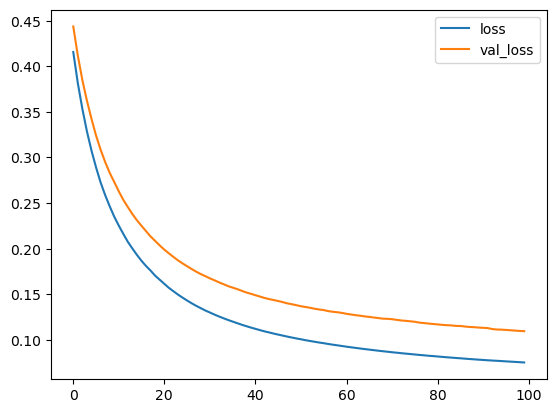

In [17]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

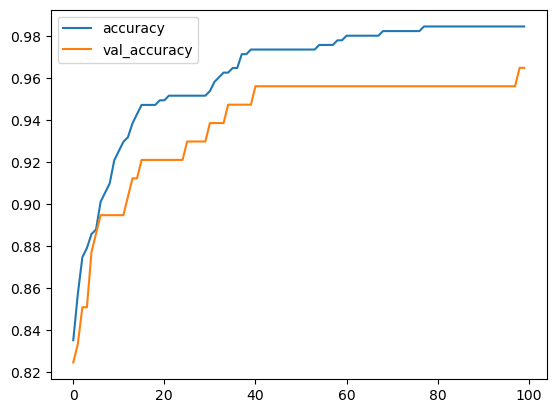

In [18]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();

### Making Predictions

In [19]:
# We can analyse the outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

P = model.predict(x_test)
print(P[:10])

4/4 [==============================] - 0s 1ms/step
[[9.8835051e-01]
 [7.2433375e-04]
 [9.9879557e-01]
 [9.4268739e-01]
 [4.4930137e-05]
 [9.9899322e-01]
 [6.9203176e-02]
 [2.7467295e-05]
 [1.6100390e-02]
 [9.9995404e-01]]


In [20]:
# We can round the output numbers to get the actual predictions
# They have to be flattened since the targets are size (N,) while the predictions are size (N,1)

P = np.round(P).flatten()
print(P)

[1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.]


In [21]:
# We can also calculate the accuracy manually and compare it to the evaluate() output

print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(x_test, y_test))

Manually calculated accuracy: 0.9649122807017544
4/4 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9649
Evaluate output: [0.10957915335893631, 0.9649122953414917]


### Saving the Model

In [22]:
# We can also save the model in our local directory

model.save('linearclassifier.h5')   

In [23]:
# Loading the same model trained and making use of it
# From the metrics below, we can see that this is the same model 

model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9649


[0.10957915335893631, 0.9649122953414917]